In [1]:
!nvidia-smi

Fri May 17 12:39:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [29]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!gdown 1TGwKprghhECNyCRJzi7XhbH4O3n0N_Xf
!gdown 1NqTGKG_9i6c0QmeTb4o2xKlAZSSr1QPA
!gdown 1qt_C3lqn0MESRRkyp1JvNj23u9kWwrZW
!gdown 1MHinoWJIU7EdL7Wt6tNHTM-1NtmJUFti
!gdown 1fxKxU2YjvC9XLcOz4OcvU1_DMJP_kLUc

!zip -s 0 caers_split.zip --out caers.zip; unzip caers.zip
!unzip caers.zip

Streaming output truncated to the last 5000 lines.
  inflating: CAER-S/train/Disgust/2994.png  
  inflating: CAER-S/train/Disgust/3452.png  
  inflating: CAER-S/train/Disgust/1245.png  
  inflating: CAER-S/train/Disgust/1251.png  
  inflating: CAER-S/train/Disgust/2758.png  
  inflating: CAER-S/train/Disgust/5037.png  
  inflating: CAER-S/train/Disgust/2980.png  
  inflating: CAER-S/train/Disgust/4329.png  
  inflating: CAER-S/train/Disgust/3446.png  
  inflating: CAER-S/train/Disgust/3320.png  
  inflating: CAER-S/train/Disgust/5989.png  
  inflating: CAER-S/train/Disgust/5751.png  
  inflating: CAER-S/train/Disgust/1537.png  
  inflating: CAER-S/train/Disgust/6258.png  
  inflating: CAER-S/train/Disgust/0629.png  
  inflating: CAER-S/train/Disgust/3308.png  
  inflating: CAER-S/train/Disgust/4467.png  
  inflating: CAER-S/train/Disgust/5779.png  
  inflating: CAER-S/train/Disgust/2016.png  
  inflating: CAER-S/train/Disgust/6270.png  
  inflating: CAER-S/train/Disgust/0601.png  
  in

In [31]:
!rm /content/datasets/caers.zip
!rm /content/datasets/caers_split.z01
!rm /content/datasets/caers_split.z02
!rm /content/datasets/caers_split.z03
!rm /content/datasets/caers_split.z04
!rm /content/datasets/caers_split.zip


## Custom Training

In [32]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data=/content/datasets/CAER-S epochs=5 imgsz=128

/content
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/CAER-S, epochs=5, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [34]:
!ls -la {HOME}/runs/classify/train/

total 1124
drwxr-xr-x 3 root root   4096 May 17 14:28 .
drwxr-xr-x 3 root root   4096 May 17 13:13 ..
-rw-r--r-- 1 root root   1545 May 17 13:13 args.yaml
-rw-r--r-- 1 root root 191680 May 17 14:28 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 190129 May 17 14:28 confusion_matrix.png
-rw-r--r-- 1 root root 122322 May 17 14:29 events.out.tfevents.1715951610.c121a1979150.9662.0
-rw-r--r-- 1 root root   1152 May 17 14:25 results.csv
-rw-r--r-- 1 root root 122255 May 17 14:28 results.png
-rw-r--r-- 1 root root  51564 May 17 13:15 train_batch0.jpg
-rw-r--r-- 1 root root  53905 May 17 13:15 train_batch1.jpg
-rw-r--r-- 1 root root  49645 May 17 13:15 train_batch2.jpg
-rw-r--r-- 1 root root  54268 May 17 14:25 val_batch0_labels.jpg
-rw-r--r-- 1 root root  54366 May 17 14:25 val_batch0_pred.jpg
-rw-r--r-- 1 root root  52963 May 17 14:25 val_batch1_labels.jpg
-rw-r--r-- 1 root root  53034 May 17 14:25 val_batch1_pred.jpg
-rw-r--r-- 1 root root  54333 May 17 14:25 val_batch2_labels.jpg
-

In [35]:
!cat {HOME}/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                  1.882,                0.37305,                0.88843,                 1.8558,             0.00023792,             0.00023792,             0.00023792
                      2,                 1.6655,                0.48228,                0.93769,                 1.7588,             0.00038169,             0.00038169,             0.00038169
                      3,                 1.4946,                0.56174,                0.95717,                 1.6906,             0.00043121,             0.00043121,             0.00043121
                      4,                 1.3522,                 0.6159,                0.96961,                 1.6283,             0.00028988,             0.00028988,             0.00028988
                      5,                

In [39]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source=/content/datasets/CAER-S/test/Happy

/content
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1443847 parameters, 0 gradients, 3.3 GFLOPs

image 1/2999 /content/datasets/CAER-S/test/Happy/0001.png: 128x128 Happy 0.82, Neutral 0.12, Surprise 0.03, Angry 0.02, Sad 0.01, 4.8ms
image 2/2999 /content/datasets/CAER-S/test/Happy/0002.png: 128x128 Happy 0.76, Neutral 0.08, Disgust 0.07, Surprise 0.06, Sad 0.01, 4.3ms
image 3/2999 /content/datasets/CAER-S/test/Happy/0003.png: 128x128 Happy 0.36, Neutral 0.29, Surprise 0.17, Angry 0.08, Disgust 0.08, 4.1ms
image 4/2999 /content/datasets/CAER-S/test/Happy/0004.png: 128x128 Neutral 0.36, Happy 0.27, Angry 0.15, Surprise 0.11, Disgust 0.06, 4.5ms
image 5/2999 /content/datasets/CAER-S/test/Happy/0005.png: 128x128 Neutral 0.42, Happy 0.22, Surprise 0.13, Angry 0.10, Disgust 0.07, 4.3ms
image 6/2999 /content/datasets/CAER-S/test/Happy/0006.png: 128x128 Happy 0.50, Surprise 0.48, Neutral 0.02, Sad 0.00, Angry 0

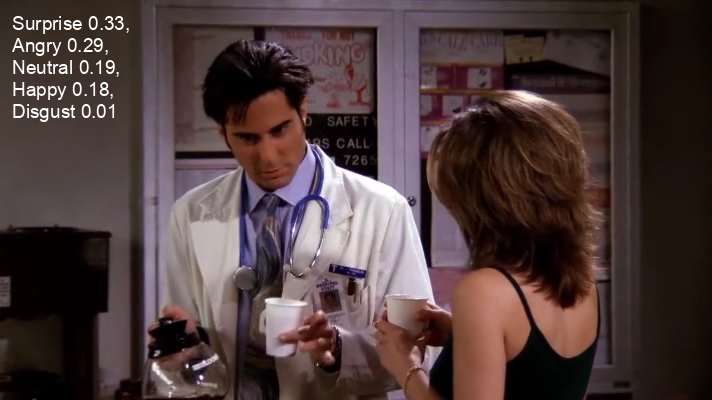

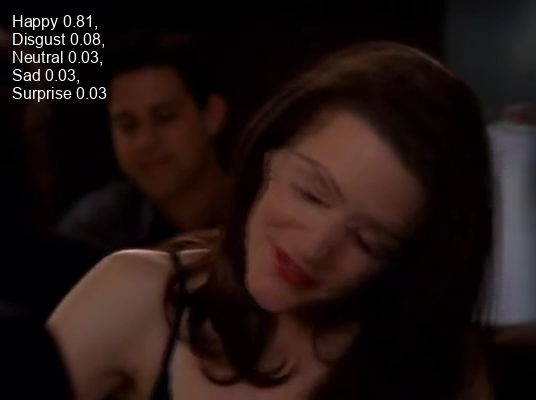

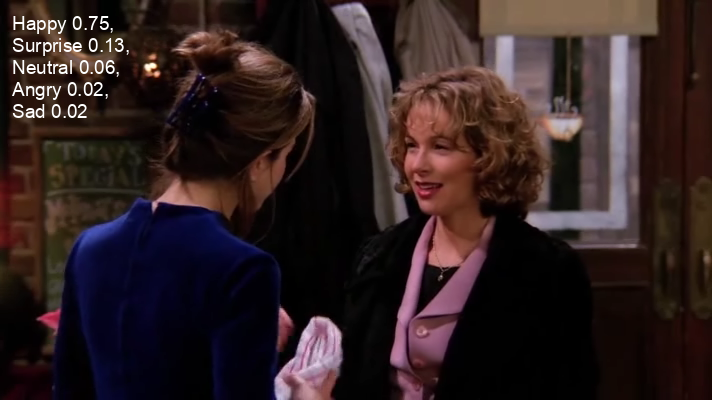

In [50]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.png')[3:6]:
      display(Image(filename=image_path, width=600))
      print("\n")